In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

# $Bin(50, p)$

In [2]:
N = 1000
K = 500
# берем параметры случайно из Beta(3,5)
beta_rv = sts.beta(3,5)

Расчет бурстрепной дисперсии для $n \leq N = 1000$

## $\frac{\bar{X}}{m}$ эффективная оценка параметра $p$, где $m = 50$

In [3]:
p = beta_rv.rvs()
# генерируем Bin[m = 50, p]
m = 50
binom_rv = sts.binom(m, p)

sample = binom_rv.rvs(N)
rating = np.zeros(N)

avrg = 0.0

var_bin_1 = np.zeros(N) 

for n in xrange(0, N):
    # для каждого n <= N считаем оценки theta
    avrg = (avrg*n + sample[n])/(n+1)
    rating[n] = float(avrg)/m
    # бустрепное параметрическое распределение
    bytstrep_rv = sts.binom(m, rating[n])
    result_rating = np.zeros(K)
    
    for x in xrange(0, K):
        # генерируем выбороку размера n + 1
        bytstrep_sample = bytstrep_rv.rvs(n + 1)
        # добавляем итоговые оценки параметра
        result_rating[x] = np.mean(bytstrep_sample)/m

    var_bin_1[n] = np.var(result_rating)

#### Построение графиков для проверки неравенства Рао-Крамера

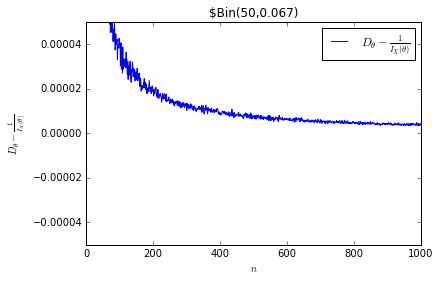

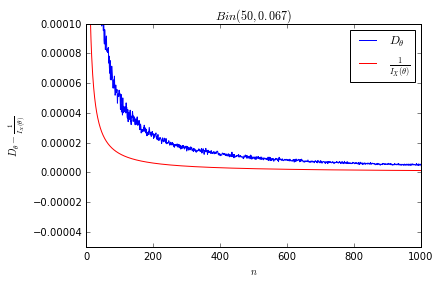

In [64]:
info_fisher = float(m)/(p*(1-p))

# построение графиков
x = np.arange(1, N + 1, 1)
plt.plot(x, var_bin_1 - (info_fisher*x)**(-1), label = '$D_{\\theta} - \\frac{1}{I_{X}(\\theta)}$')
plt.ylabel('$D_{\\theta} - \\frac{1}{I_{X}(\\theta)}$')
plt.xlabel('$n$')
plt.legend()
plt.ylim(-0.00005,0.00005)
plt.title("$Bin({},{})".format(m,round(p,3)))
plt.show()


# построение графиков
x = np.arange(1, N + 1, 1)
plt.plot(x, var_bin_1, label = '$D_{\\theta}$')
plt.plot(x, (info_fisher*x)**(-1), label = '$\\frac{1}{I_{X}(\\theta)}$', color = 'red')
plt.ylabel('$D_{\\theta} - \\frac{1}{I_{X}(\\theta)}$')
plt.xlabel('$n$')
plt.legend()
plt.ylim(-0.00005,0.0001)
plt.title("$Bin({},{})$".format(m,round(p,3)))
plt.show()

#### Вывод

Из графиков видно, что для несмещенной оценки неравенство Рао-Крамера выполняется.

## $\frac{X_{1}}{m}$ несмещенная оценка параметра $p$, где $m = 50$

In [5]:
p = beta_rv.rvs()
# генерируем Bin[m = 50, p]
m = 50
binom_rv = sts.binom(m, p)
print p
sample = binom_rv.rvs(N)

rating = float(sample[0])/m
print rating

var_bin_2 = np.zeros(N) 

# бустрепное параметрическое распределение
bytstrep_rv = sts.binom(m, rating)

for n in xrange(0, N):
    result_rating = np.zeros(K)
    
    for x in xrange(0, K):
        # генерируем выбороку размера n + 1
        bytstrep_sample = bytstrep_rv.rvs(n + 1)
        # добавляем итоговые оценки параметра
        result_rating[x] = float(bytstrep_sample[0])/m
    
    var_bin_2[n] = np.var(result_rating)

0.533518618092
0.48


#### Построение графиков для проверки неравенства Рао-Крамера

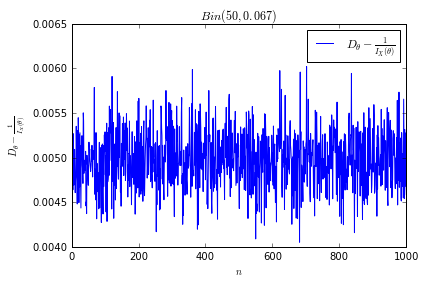

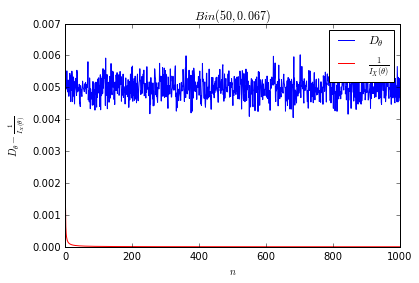

In [65]:
info_fisher = float(m)/(p*(1-p))

# построение графиков
x = np.arange(1, N + 1, 1)
plt.plot(x, var_bin_2 - (info_fisher*x)**(-1), label = '$D_{\\theta} - \\frac{1}{I_{X}(\\theta)}$')
plt.ylabel('$D_{\\theta} - \\frac{1}{I_{X}(\\theta)}$')
plt.xlabel('$n$')
plt.legend()
#plt.ylim(-0.00005,0.00005)
plt.title("$Bin({},{})$".format(m,round(p,3)))
plt.show()


# построение графиков
x = np.arange(1, N + 1, 1)
plt.plot(x, var_bin_2, label = '$D_{\\theta}$')
plt.plot(x, (info_fisher*x)**(-1), label = '$\\frac{1}{I_{X}(\\theta)}$', color = 'red')
plt.ylabel('$D_{\\theta} - \\frac{1}{I_{X}(\\theta)}$')
plt.xlabel('$n$')
plt.legend()
#plt.ylim(-0.00005,0.0001)
plt.title("$Bin({},{})$".format(m,round(p,3)))
plt.show()

#### Вывод

Из графиков видно, что для несмещенной оценки неравенство Рао-Крамера выполняется.

# $Exp(\theta)$

In [7]:
N = 1000
K = 500
# берем параметры случайно из Beta(3,5)
beta_rv = sts.beta(3,5)

Расчет бурстрепной дисперсии для $n \leq N = 1000$

## $\bar{X}$ эффективная оценка параметра $\frac{1}{\theta}$

In [25]:
theta = beta_rv.rvs()
# генерируем Exp(theta)
exp_rv = sts.expon(theta)

sample = exp_rv.rvs(N)
rating = np.zeros(N)

avrg = 0.0

var_exp_1 = np.zeros(N) 

for n in xrange(0, N):
    # для каждого n <= N считаем оценки theta
    avrg = (avrg*n + sample[n])/(n+1)
    rating[n] = float(avrg)
    # бустрепное параметрическое распределение
    bytstrep_rv = sts.expon(1.0/rating[n])
    result_rating = np.zeros(K)
    
    for x in xrange(0, K):
        # генерируем выбороку размера n + 1
        bytstrep_sample = bytstrep_rv.rvs(n + 1)
        # добавляем итоговые оценки параметра
        result_rating[x] = np.mean(bytstrep_sample)

    var_exp_1[n] = np.var(result_rating)

#### Построение графиков для проверки неравенства Рао-Крамера

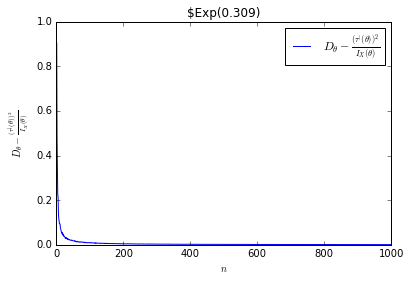

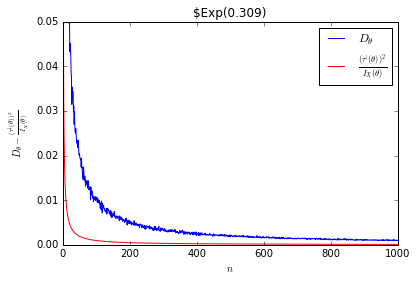

In [62]:
info_fisher = 1.0/(theta**2)
# построение графиков
x = np.arange(1, N + 1, 1)
plt.plot(x, var_exp_1 - (1.0/(info_fisher*x)), label = '$D_{\\theta} - \\frac{(\\tau^{|}(\\theta))^{2}}{I_{X}(\\theta)}$')
plt.ylabel('$D_{\\theta} - \\frac{(\\tau^{|}(\\theta))^{2}}{I_{X}(\\theta)}$')
plt.xlabel('$n$')
plt.legend()
#plt.ylim(-0.00005,0.00005)
plt.title("$Exp({})".format(round(theta,3)))
plt.show()


# построение графиков
x = np.arange(1, N + 1, 1)
plt.plot(x, var_exp_1, label = '$D_{\\theta}$')
plt.plot(x, (1.0/(x*info_fisher)), label = '$\\frac{(\\tau^{|}(\\theta))^{2}}{I_{X}(\\theta)}$', color = 'red')
plt.ylabel('$D_{\\theta} - \\frac{(\\tau^{|}(\\theta))^{2}}{I_{X}(\\theta)}$')
plt.xlabel('$n$')
plt.legend()
plt.ylim(0,0.05)
plt.title("$Exp({})".format(round(theta,3)))
plt.show()

#### Вывод

Из графиков видно, что для несмещенной оценки неравенство Рао-Крамера выполняется.

## $\frac{1}{2\bar{X}}+\frac{n}{2X_{(1)}}$ несмещенная оценка параметра $\theta$

In [33]:
theta = beta_rv.rvs()
# генерируем Exp(theta)
exp_rv = sts.expon(theta)
sample = exp_rv.rvs(N)

avrg = float(sample[0])
min_el = float(sample[0])
rating = np.zeros(N)

var_exp_2 = np.zeros(N) 

# бустрепное параметрическое распределение
bytstrep_rv = sts.expon(theta)

for n in xrange(0, N):
    # для каждого n <= N считаем оценки theta
    avrg = (avrg*n + sample[n])/(n+1)
    if(sample[n] < min_el):
        min_el = sample[n]
        
    rating[n] = 1.0/(2*avrg)+float(n+1)/(2*min_el)
    
    # бустрепное параметрическое распределение
    bytstrep_rv = sts.expon(rating[n])
    result_rating = np.zeros(K)
    
    for x in xrange(0, K):
        # генерируем выбороку размера n + 1
        bytstrep_sample = bytstrep_rv.rvs(n + 1)
        # добавляем итоговые оценки параметра
        result_rating[x] = float(bytstrep_sample[0])
    
    var_exp_2[n] = np.var(result_rating)

#### Построение графиков для проверки неравенства Рао-Крамера

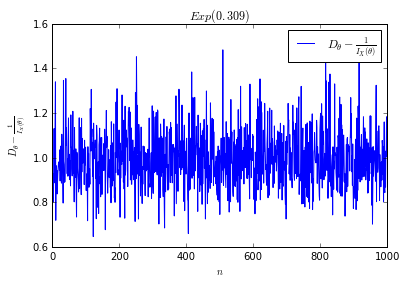

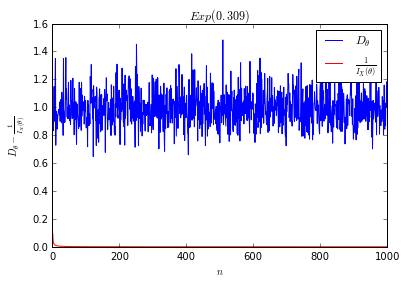

In [63]:
info_fisher = 1.0/theta**2

# построение графиков
x = np.arange(1, N + 1, 1)
plt.plot(x, var_exp_2 - (info_fisher*x)**(-1), label = '$D_{\\theta} - \\frac{1}{I_{X}(\\theta)}$')
plt.ylabel('$D_{\\theta} - \\frac{1}{I_{X}(\\theta)}$')
plt.xlabel('$n$')
plt.legend()
#plt.ylim(-0.00005,0.00005)
plt.title("$Exp({})$".format(round(theta,3)))
plt.show()


# построение графиков
x = np.arange(1, N + 1, 1)
plt.plot(x, var_exp_2, label = '$D_{\\theta}$')
plt.plot(x, (info_fisher*x)**(-1), label = '$\\frac{1}{I_{X}(\\theta)}$', color = 'red')
plt.ylabel('$D_{\\theta} - \\frac{1}{I_{X}(\\theta)}$')
plt.xlabel('$n$')
plt.legend()
#plt.ylim(-0.00005,0.0001)
plt.title("$Exp({})$".format(round(theta,3)))
plt.show()

#### Вывод

Из графиков видно, что для несмещенной оценки неравенство Рао-Крамера выполняется.

# $N(3, \sigma^{2})$

In [12]:
N = 1000
K = 500
# берем параметры случайно из Beta(3,5)
beta_rv = sts.beta(3,5)

Расчет бурстрепной дисперсии для $n \leq N = 1000$

## $\bar{(X-\mu)^{2}}$ эффективная оценка параметра $\sigma^{2}$, где $\mu = 3$

In [13]:
mu = 3
sigma = beta_rv.rvs()
# генерируем N(mu=3,sigma^2)
norm_rv = sts.norm(mu, sigma)

sample = norm_rv.rvs(N)
rating = np.zeros(N)

avrg = float(sample[0]-mu)**2

var_norm_1 = np.zeros(N) 

for n in xrange(0, N):
    # для каждого n <= N считаем оценки theta
    avrg = (avrg*n + (sample[n]-mu)**2)/(n+1)
    rating[n] = float(avrg)
    # бустрепное параметрическое распределение
    bytstrep_rv = sts.norm(mu, np.sqrt(rating[n]))
    result_rating = np.zeros(K)
    
    for x in xrange(0, K):
        # генерируем выбороку размера n + 1
        bytstrep_sample = bytstrep_rv.rvs(n + 1)
        # добавляем итоговые оценки параметра
        result_rating[x] = np.mean(bytstrep_sample)

    var_norm_1[n] = np.var(result_rating)

#### Построение графиков для проверки неравенства Рао-Крамера

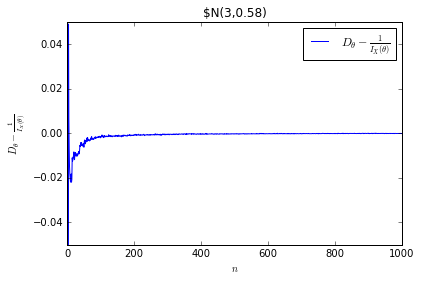

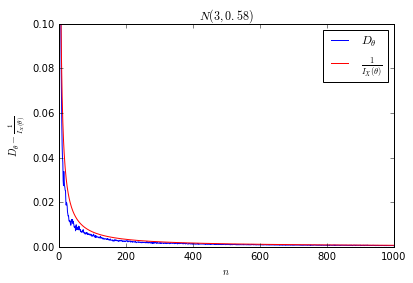

In [44]:
info_fisher = 1.0/(2*sigma**4)

# построение графиков
x = np.arange(1, N + 1, 1)
plt.plot(x, var_norm_1 - (info_fisher*x)**(-1), label = '$D_{\\theta} - \\frac{1}{I_{X}(\\theta)}$')
plt.ylabel('$D_{\\theta} - \\frac{1}{I_{X}(\\theta)}$')
plt.xlabel('$n$')
plt.legend()
plt.ylim(-0.05,0.05)
plt.title("$N({},{})".format(mu,round(sigma**2,3)))
plt.show()


# построение графиков
x = np.arange(1, N + 1, 1)
plt.plot(x, var_norm_1, label = '$D_{\\theta}$')
plt.plot(x, (info_fisher*x)**(-1), label = '$\\frac{1}{I_{X}(\\theta)}$', color = 'red')
plt.ylabel('$D_{\\theta} - \\frac{1}{I_{X}(\\theta)}$')
plt.xlabel('$n$')
plt.legend()
plt.ylim(0,0.1)
plt.title("$N({},{})$".format(mu,round(sigma**2,3)))
plt.show()

#### Вывод

Из графиков видно, что для эффективной оценки в неравенстве Рао-Крамера достигается равенство.

## $\hat{\mu}$ несмещенная оценка параметра $\sigma^{2}$

In [45]:
mu = 3
sigma = beta_rv.rvs()
# генерируем N(mu=3,sigma^2)
norm_rv = sts.norm(mu, sigma)

sample = norm_rv.rvs(N)
rating = np.zeros(N)

var_norm_2 = np.zeros(N) 

for n in xrange(0, N):
    # для каждого n <= N считаем оценки theta
    rating[n] = np.median(sample[:n+1])
    # бустрепное параметрическое распределение
    bytstrep_rv = sts.norm(mu, np.sqrt(rating[n]))
    result_rating = np.zeros(K)
    
    for x in xrange(0, K):
        # генерируем выбороку размера n + 1
        bytstrep_sample = bytstrep_rv.rvs(n + 1)
        # добавляем итоговые оценки параметра
        result_rating[x] = np.median(bytstrep_sample[:x+1])

    var_norm_2[n] = np.var(result_rating)

#### Построение графиков для проверки неравенства Рао-Крамера

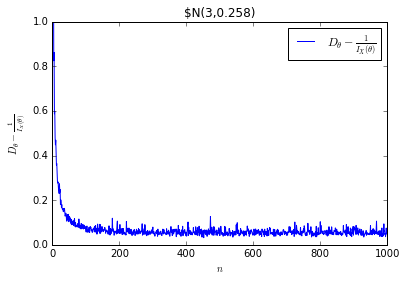

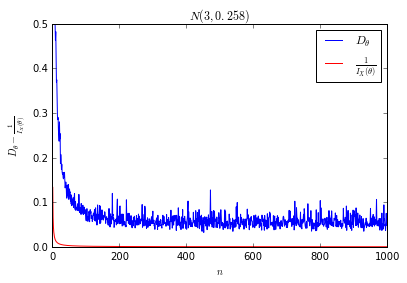

In [48]:
info_fisher = 1.0/(2*sigma**4)

# построение графиков
x = np.arange(1, N + 1, 1)
plt.plot(x, var_norm_2 - (info_fisher*x)**(-1), label = '$D_{\\theta} - \\frac{1}{I_{X}(\\theta)}$')
plt.ylabel('$D_{\\theta} - \\frac{1}{I_{X}(\\theta)}$')
plt.xlabel('$n$')
plt.legend()
plt.ylim(0,1)
plt.title("$N({},{})".format(mu,round(sigma**2,3)))
plt.show()


# построение графиков
x = np.arange(1, N + 1, 1)
plt.plot(x, var_norm_2, label = '$D_{\\theta}$')
plt.plot(x, (info_fisher*x)**(-1), label = '$\\frac{1}{I_{X}(\\theta)}$', color = 'red')
plt.ylabel('$D_{\\theta} - \\frac{1}{I_{X}(\\theta)}$')
plt.xlabel('$n$')
plt.legend()
plt.ylim(0,0.5)
plt.title("$N({},{})$".format(mu,round(sigma**2,3)))
plt.show()

#### Вывод

Из графиков видно, что для несмещенной оценки неравенство Рао-Крамера выполняется.

# $N(\mu, 2.1)$

In [49]:
N = 1000
K = 500
# берем параметры случайно из Beta(3,5)
beta_rv = sts.beta(3,5)

Расчет бурстрепной дисперсии для $n \leq N = 1000$

## $\bar{X^{2}}$ эффективная оценка параметра $\mu$

In [52]:
mu = beta_rv.rvs()
sigma = np.sqrt(2.1)
# генерируем N(mu,2.1)
norm_rv = sts.norm(mu, sigma)

sample = norm_rv.rvs(N)
rating = np.zeros(N)

avrg = float(sample[0])**2

var_norm_3 = np.zeros(N) 

for n in xrange(0, N):
    # для каждого n <= N считаем оценки theta
    avrg = (avrg*n + (sample[n])**2)/(n+1)
    rating[n] = float(avrg)
    # бустрепное параметрическое распределение
    bytstrep_rv = sts.norm(rating[n], 2.1)
    result_rating = np.zeros(K)
    
    for x in xrange(0, K):
        # генерируем выбороку размера n + 1
        bytstrep_sample = bytstrep_rv.rvs(n + 1)
        # добавляем итоговые оценки параметра
        result_rating[x] = np.mean(bytstrep_sample)

    var_norm_3[n] = np.var(result_rating)

#### Построение графиков для проверки неравенства Рао-Крамера

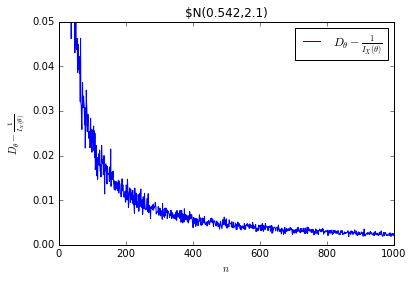

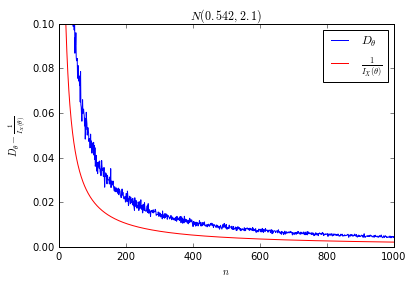

In [60]:
info_fisher = 1.0/(sigma**2)

# построение графиков
x = np.arange(1, N + 1, 1)
plt.plot(x, var_norm_3 - (info_fisher*x)**(-1), label = '$D_{\\theta} - \\frac{1}{I_{X}(\\theta)}$')
plt.ylabel('$D_{\\theta} - \\frac{1}{I_{X}(\\theta)}$')
plt.xlabel('$n$')
plt.legend()
plt.ylim(0,0.05)
plt.title("$N({},{})".format(round(mu,3),round(sigma**2,2)))
plt.show()


# построение графиков
x = np.arange(1, N + 1, 1)
plt.plot(x, var_norm_3, label = '$D_{\\theta}$')
plt.plot(x, (info_fisher*x)**(-1), label = '$\\frac{1}{I_{X}(\\theta)}$', color = 'red')
plt.ylabel('$D_{\\theta} - \\frac{1}{I_{X}(\\theta)}$')
plt.xlabel('$n$')
plt.legend()
plt.ylim(0,0.1)
plt.title("$N({},{})$".format(round(mu,3),round(sigma**2,2)))
plt.show()

#### Вывод

Из графиков видно, что для несмещенной оценки неравенство Рао-Крамера выполняется.

## $\hat{\mu}$ несмещенная оценка параметра $\mu$

In [55]:
mu = beta_rv.rvs()
sigma = np.sqrt(2.1)
# генерируем N(mu,2.1)
norm_rv = sts.norm(mu, sigma)

sample = norm_rv.rvs(N)
rating = np.zeros(N)

var_norm_4 = np.zeros(N) 

for n in xrange(0, N):
    # для каждого n <= N считаем оценки theta
    rating[n] = np.median(sample[:n+1])
    # бустрепное параметрическое распределение
    bytstrep_rv = sts.norm(rating[n], sigma)
    result_rating = np.zeros(K)
    
    for x in xrange(0, K):
        # генерируем выбороку размера n + 1
        bytstrep_sample = bytstrep_rv.rvs(n + 1)
        # добавляем итоговые оценки параметра
        result_rating[x] = np.median(bytstrep_sample[:x+1])

    var_norm_4[n] = np.var(result_rating)

#### Построение графиков для проверки неравенства Рао-Крамера

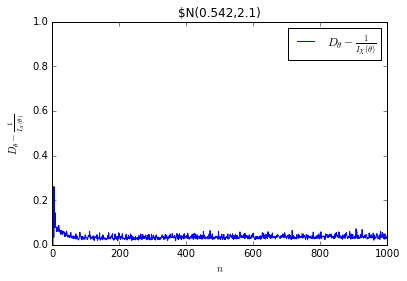

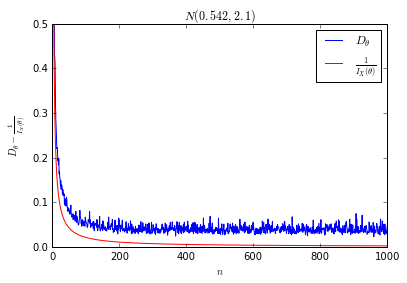

In [58]:
info_fisher = 1.0/(sigma**2)

# построение графиков
x = np.arange(1, N + 1, 1)
plt.plot(x, var_norm_4 - (info_fisher*x)**(-1), label = '$D_{\\theta} - \\frac{1}{I_{X}(\\theta)}$')
plt.ylabel('$D_{\\theta} - \\frac{1}{I_{X}(\\theta)}$')
plt.xlabel('$n$')
plt.legend()
plt.ylim(0,1)
plt.title("$N({},{})".format(round(mu,3),round(sigma**2,3)))
plt.show()


# построение графиков
x = np.arange(1, N + 1, 1)
plt.plot(x, var_norm_4, label = '$D_{\\theta}$')
plt.plot(x, (info_fisher*x)**(-1), label = '$\\frac{1}{I_{X}(\\theta)}$', color = 'red')
plt.ylabel('$D_{\\theta} - \\frac{1}{I_{X}(\\theta)}$')
plt.xlabel('$n$')
plt.legend()
plt.ylim(0,0.5)
plt.title("$N({},{})$".format(round(mu,3),round(sigma**2,3)))
plt.show()

#### Вывод

Из графиков видно, что для несмещенной оценки неравенство Рао-Крамера выполняется.